<a href="https://colab.research.google.com/github/ksolaiman/MMIR-SQL-GCN/blob/master/pr_curve_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from os import listdir
from os.path import isfile, join


In [2]:
onlyfiles = [f for f in listdir(".") if isfile(join(".", f))]

In [3]:
files = list()
for file in onlyfiles:
    if ".pkl" in file:
        print(file[:-4].split("-")[0:2])
        files.append(file[:-4].split("-")[0])


['145', '539']
['145', '145']
['1144', '539']
['145', '539']
['539', '145']
['145', '1828precision']
['539', '1828']
['145', '145']
['1144', '145precision']
['145', '539']
['539', '1828']
['145', '145precision']
['539', '1144recall']
['1144', '1144']
['539', '145']
['1144', '145']
['539', '145']
['145', '539']
['1144', '1144precision']
['1144', '145recall']
['539', '1144']
['1144', '1144']
['539', '1144']
['145', '145']
['145', '145']
['1144', '539precision']
['1144', '1828']
['539', '1828precision']
['145', '1144']
['539', '539']
['539', '1828']
['1144', '145']
['1144', '539recall']
['145', '1144']
['539', '1828']
['539', '539']
['539', '145']
['1144', '1144recall']
['145', '145']
['1144', '1828']
['539', '1144']
['1144', '1144']
['145', '1144recall']
['1144', '1828recall']
['145', '1828']
['145', '1144']
['1144', '145']
['1144', '539']
['1144', '1828']
['145', '1828recall']
['539', '1144']
['539', '1144']
['145', '539']
['145', '539precision']
['145', '1144']
['539', '145']
['145', '

In [4]:
import numpy as np
arr = [0.001]
arr = np.append(arr, np.arange(0.05, 1, 0.05))

arr = np.append(arr, [0.999])
arr = arr.round(decimals=3)
print(arr)
#arr = list(arr)
arr = [round(item, 4) for item in arr]
print(arr)

[0.001 0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
 0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  0.999]
[np.float64(0.001), np.float64(0.05), np.float64(0.1), np.float64(0.15), np.float64(0.2), np.float64(0.25), np.float64(0.3), np.float64(0.35), np.float64(0.4), np.float64(0.45), np.float64(0.5), np.float64(0.55), np.float64(0.6), np.float64(0.65), np.float64(0.7), np.float64(0.75), np.float64(0.8), np.float64(0.85), np.float64(0.9), np.float64(0.95), np.float64(0.999)]


In [5]:
import numpy as np
arr = [0]
arr = np.append(arr, np.arange(49, 950, 50))

arr = np.append(arr, [998])
#arr = arr.round(decimals=3)
print(arr)
arr = list(arr)
#arr = [round(item, 4) for item in arr]
print(arr)

[  0  49  99 149 199 249 299 349 399 449 499 549 599 649 699 749 799 849
 899 949 998]
[np.int64(0), np.int64(49), np.int64(99), np.int64(149), np.int64(199), np.int64(249), np.int64(299), np.int64(349), np.int64(399), np.int64(449), np.int64(499), np.int64(549), np.int64(599), np.int64(649), np.int64(699), np.int64(749), np.int64(799), np.int64(849), np.int64(899), np.int64(949), np.int64(998)]


145 145
145 539
145 1144
145 1828


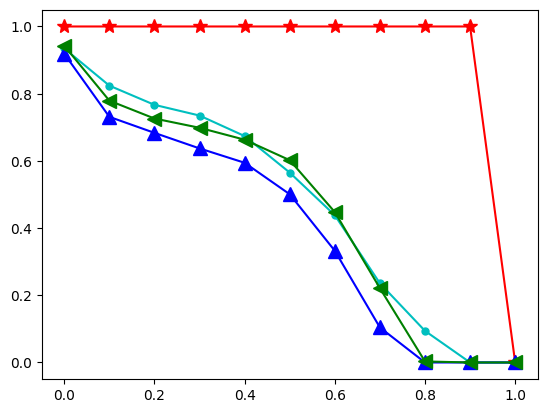

In [6]:
import pickle
from matplotlib import pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

clr = ['r', 'c', 'b', 'g']
marker = ['*','.','^','<']
names = ['145', '539', '1144', '1828']
lbl = ['Text-->Text','Text-->Video', 'Text-->Image',  'Text-->All']

for idx2, name1 in enumerate(names[0:1]):#[:-1]:
    for idx, name2 in enumerate(names[0:4]):
        print(name1, name2)
        with open(name1+"-"+name2+"-precision-11-point.pkl", "rb") as f:
            precision = pickle.load(f)
        with open(name1+"-"+name2+"-recall-11-point.pkl", "rb") as f:
            recall = pickle.load(f)

        plt.plot(recall, precision, marker[idx]+'-'+clr[idx], markevery=1, markersize=10, label=lbl[idx])
#         disp = PrecisionRecallDisplay(precision, recall)
#         disp.plot()
#         plt.show()

In [71]:
# Define color families for each retrieval task
task_color_families = {
    'text':  ['darkorange', 'navy', 'darkgreen', 'black'],
    'image': ['orange', 'blue', 'green', 'dimgray'],
    'video': ['saddlebrown', 'darkolivegreen', 'seagreen', 'forestgreen'],
    'all':   ['black', 'dimgray', 'gray', 'slategray']
}

def get_colors(target_modality, num_models):
    """
    Return a list of colors for the given task,
    adjusted to the number of models to plot.
    """
    base_colors = task_color_families.get(target_modality, ['black'])
    if len(base_colors) >= num_models:
        return base_colors[:num_models]
    else:
        # Repeat colors if not enough
        repeats = (num_models // len(base_colors)) + 1
        return (base_colors * repeats)[:num_models]

# usage
num_models = 2
colors = get_colors('text', num_models)
print(colors)
for model_idx in range(num_models):
    color = colors[model_idx]



['darkorange', 'navy']


In [79]:
import os
from datetime import datetime

def save_pr_curve_plot(query, target, figure=None, models="EARS+FemmIR", outdir='graphs/pr_curves', add_date=True, date_format="%Y-%m-%d"):
    """
    Save the current matplotlib plot to PDF and PNG in structured folders.

    Parameters:
    - query: str, query modality (e.g., 'image')
    - target: str, target modality (e.g., 'video')
    - figure: matplotlib.pyplot.plot object, optional
    - models: str, model names (e.g., 'EARS', 'FemmIR')
    - outdir: str, base output folder is 'graphs/pr_curves'
    - add_date: bool, whether to append current date to filename
    - date_format: str, date format (default: YYYY-MM-DD)
    """
    # Ensure output folders exist
    pdf_dir = os.path.join(outdir, 'pdf')
    png_dir = os.path.join(outdir, 'png')
    os.makedirs(pdf_dir, exist_ok=True)
    os.makedirs(png_dir, exist_ok=True)

    # Optional date stamp
    date_suffix = ''
    if add_date:
        today = datetime.now().strftime(date_format)
        date_suffix = f"_{today}"

    # Create filename
    base_name = f"{query}Q_{target}T_{models}_prcurve{date_suffix}"

    # Save both formats
    plt.savefig(os.path.join(pdf_dir, f"{base_name}.pdf"), bbox_inches='tight')
    plt.savefig(os.path.join(png_dir, f"{base_name}.png"), dpi=300, bbox_inches='tight')


# usage
figure = plt.figure()
save_pr_curve_plot('image', 'video', figure, 'EARS')
save_pr_curve_plot('video', 'image', figure, 'EARS+FemmIR', add_date=True)



<Figure size 640x480 with 0 Axes>

image image
image video


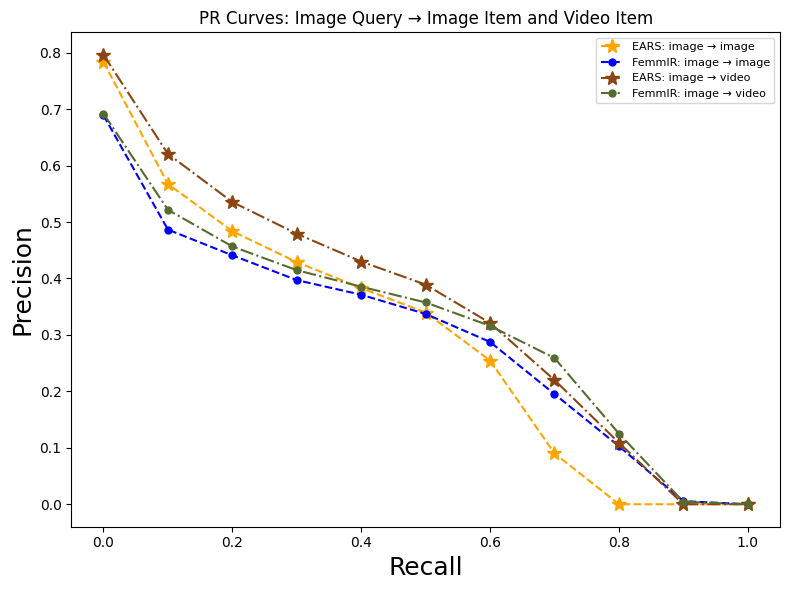

In [96]:
# copy for 2025 run
# graph comapring ears vs femmir
import pickle
from matplotlib import pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

# clr = [['r', 'g'],
#        ['c', 'm'],
#        ['b', 'y'],
#        ['b', 'y']]

marker = ['*','.']                # how many models
#, '-', '--', '.-',''
lbl = ['EARS', 'FemmIR']

names = ['text', 'video', 'image', 'all']
noofobj= ['145', '539', '1144', '1828']
line_styles = ['-', '--', '-.', ':']

# lbl = ['Text-->Text','Text-->Video', 'Text-->Image',  'Text-->All']
#
# multilbl = [['EARS: img --> txt', 'FemmIR: img --> txt'],
#             ['EARS: img --> img', 'FemmIR: img --> img'],
#             ['EARS: img --> vid', 'FemmIR: img --> vid'],
#             ['EARS: img --> all', 'FemmIR: img --> all']]

def show_compare(name1, name2, plotno=0, simgnn_model_folder=None):
        print(name1, name2)

        # get color family for target/item modality; 2nd param is #models
        colors = get_colors(name2, 2)

        name1_idx = noofobj[names.index(name1)]
        name2_idx = noofobj[names.index(name2)]
        with open(name1_idx +"-"+ name2_idx +"-precision-11-point.pkl", "rb") as f:
            precision = pickle.load(f)
        with open(name1_idx +"-"+ name2_idx +"-recall-11-point.pkl", "rb") as f:
            recall = pickle.load(f)
        l1, = plt.plot(
                recall, precision,
                marker[0]+line_styles[plotno],
                color=colors[0],
                markevery=1, markersize=10,
                label=f'EARS: {name1} → {name2}'
              ) #

        model_name = "simgnn/"
        model_version = simgnn_model_folder
        with open(model_name + model_version + "/" + name1_idx +"-"+ name2_idx +"-precision-11-point.pkl", "rb") as f:
            precision = pickle.load(f)
        with open(model_name + model_version + "/" + name1_idx +"-"+ name2_idx +"-recall-11-point.pkl", "rb") as f:
            recall = pickle.load(f)
        l1, = plt.plot(
                recall, precision,
                marker[1]+line_styles[plotno],
                color=colors[1],
                markevery=1, markersize=10,
                label=f'FemmIR: {name1} → {name2}'
              ) #

        # naming the x-axis
        plt.xlabel('Recall', fontsize=18)
        # naming the y-axis
        plt.ylabel('Precision', fontsize=18)
        # plot title
        # plt.title('My bar chart!')
        plt.legend(prop={'size': 8})


def compare_modalities(query='image', split=True, targets=None, simgnn_model_folder=None):
    """
    Generalized function to plot PR curves for any query modality against specified targets.

    Parameters:
    - query: str, the query modality ('image' or 'video')
    - split: bool, whether to show separate figures (True) or a combined plot (False)
    - targets: list of target modalities to compare against. Defaults to ['image', 'video']
    """
    if targets is None:
        targets = ['image', 'video']

    # Mapping for plot titles
    title_map = {
        'text': 'Text Item',
        'image': 'Image Item',
        'video': 'Video Item',
        'all': 'All Items'
    }

    setting_map = {
        'text': 0,
        'image': 1,
        'video': 2,
        'all': 3
    }

    if simgnn_model_folder is None:
        graph_save_dir= "graphs/pr_curves"
        simgnn_model_folder = "sim-as-prediction" # Use the model whose result is in arXiv paper by default, later may change
    else:
        graph_save_dir="simgnn/" + simgnn_model_folder + "/pr_curves"

    if split:
        for idx, target in enumerate(targets):
            plt.figure(figsize=(8, 6))
            show_compare(query, target, setting_map[target], simgnn_model_folder)
            plt.title(f'PR Curve: {query.capitalize()} Query → {title_map.get(target, target.capitalize())}')
            plt.tight_layout()
            save_pr_curve_plot(query, target, plt, 'EARS+FemmIR', outdir=graph_save_dir, add_date=True)
            plt.show()
    else:
        plt.figure(figsize=(8, 6))
        for idx, target in enumerate(targets):
            show_compare(query, target, setting_map[target], simgnn_model_folder)
        target_labels = ' and '.join([title_map.get(t, t.capitalize()) for t in targets])
        plt.title(f'PR Curves: {query.capitalize()} Query → {target_labels}')
        plt.tight_layout()
        save_pr_curve_plot(query, '('+'+'.join(targets)+')', plt, 'EARS+FemmIR', outdir=graph_save_dir, add_date=True)
        plt.show()


# the following line would just save the figures in graphs/pr_curve folder
# ran with "sim-as-prediction" results
compare_modalities(query='image', split=False)

# compare_modalities(query='image', split=False, simgnn_model_folder = "sim-as-prediction")
# compare_modalities(query='video', split=False, simgnn_model_folder = "sim-as-prediction")

# for comparing against the reference model below
# compare_modalities(query='image', split=False, targets= ['text', 'image'], simgnn_model_folder = "sim-as-prediction")

image text
image image


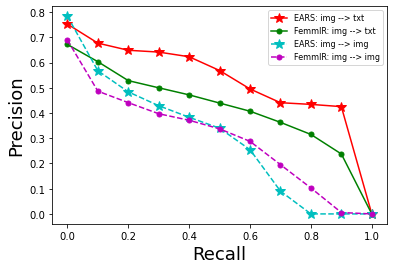

In [ ]:
# graph comapring ears vs femmir
import pickle
from matplotlib import pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

clr = [['r', 'g'],
       ['c', 'm']]
marker = ['*','.']
#, '-', '--', '.-',''
names = ['text', 'video', 'image', 'all']
noofobj= ['145', '539', '1144', '1828']
# lbl = ['Text-->Text','Text-->Video', 'Text-->Image',  'Text-->All']
lbl = ['EARS', 'FemmIR']

multilbl = [['EARS: img --> txt', 'FemmIR: img --> txt'],
            ['EARS: img --> img', 'FemmIR: img --> img']]

# for idx2, name1 in enumerate(names[0:1]):#[:-1]:
#     for idx, name2 in enumerate(names[0:4]):
def show_compare(name1, name2, symbol, plotno=0):
        print(name1, name2)
        name1 = noofobj[names.index(name1)]
        name2 = noofobj[names.index(name2)]
        with open(name1+"-"+name2+"-precision-11-point.pkl", "rb") as f:
            precision = pickle.load(f)
        with open(name1+"-"+name2+"-recall-11-point.pkl", "rb") as f:
            recall = pickle.load(f)
        l1, = plt.plot(recall, precision, marker[0]+symbol+clr[plotno][0], markevery=1, markersize=10, label=multilbl[plotno][0]) #

        with open("../latest-simgnn/data/prcurve/"+name1+"-"+name2+"-precision-11-point-sim-as-prediction.pkl", "rb") as f:
            precision = pickle.load(f)
        with open("../latest-simgnn/data/prcurve/"+name1+"-"+name2+"-recall-11-point-sim-as-prediction.pkl", "rb") as f:
            recall = pickle.load(f)
        l1, = plt.plot(recall, precision, marker[1]+symbol+clr[plotno][1], markevery=1, markersize=10, label=multilbl[plotno][1]) #

show_compare('image', 'text', '-')
# show_compare('video', 'text')
show_compare('image', 'image', '--', 1)
# show_compare('image', 'video', 3)
# show_compare('text', 'text')

# naming the x-axis
plt.xlabel('Recall', fontsize=18)
# naming the y-axis
plt.ylabel('Precision', fontsize=18)
# plot title
# plt.title('My bar chart!')
plt.legend(prop={'size': 8})

# plt.savefig("graphs_oct15/textQ-textDB.pdf")
plt.savefig("graphs_oct15/imgQ-textimgDB.pdf")
plt.show()

In [13]:
from google.colab import files
files.download("/content/simgnn.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['145', '539', '1144', '1828']
1144 539
999
1144 1144
999
1144 1828
999


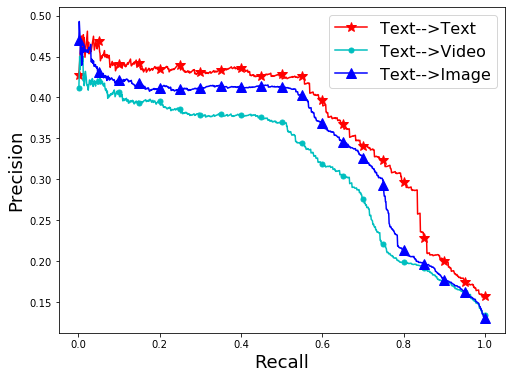

In [ ]:
names = ['145', '539', '1144', '1828']
print(names)
import pickle
from matplotlib import pyplot as plt
clr = ['r', 'c', 'b', 'g']
marker = ['*','.','^','<']
lbl = ['Text-->Text','Text-->Video', 'Text-->Image',  'Text-->All']
# lbl = ['Video-->Text', 'Image-->Text']
plt.figure(figsize=(8, 6))
for idx2, name1 in enumerate(names[2:3]):#[:-1]:
    for idx, name2 in enumerate(names[1:4]):
        print(name1, name2)
        with open(name1+"-"+name2+"-precision.pkl", "rb") as f:
            precision = pickle.load(f)
        with open(name1+"-"+name2+"-recall.pkl", "rb") as f:
            recall = pickle.load(f)
        print(len(recall))

#         # xnew = np.linspace(recall.min(), recall.max(), 500)

#         power_smooth = spline(recall, precision, xnew)

#         plt.plot(xnew,power_smooth,'*-r', markevery=50, markersize=10)

        #markind = [np.where(recall==item)[0].tolist() for item in arr]
        #print(markind)

        plt.plot(recall, precision, marker[idx]+'-'+clr[idx], markevery=arr, markersize=10, label=lbl[idx])
                 #linewidth=2)
        #plt.plot(recall, [0.5 for item in recall])

        #plt.savefig("graphs/"+name1+"-"+name2+".png")
# naming the x-axis
plt.xlabel('Recall', fontsize=18)
# naming the y-axis
plt.ylabel('Precision', fontsize=18)
# plot title
# plt.title('My bar chart!')
plt.legend(prop={'size': 16})

# plt.savefig("graphs/image-video-as-query-text-as-db.pdf")
plt.savefig("graphs/text-as-query.pdf")
plt.show()

/u/antor/u13/ksolaima/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


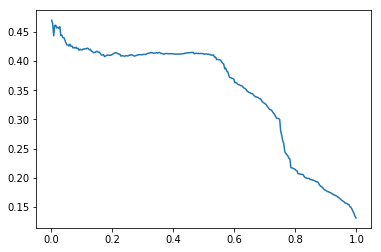

In [ ]:
from scipy.interpolate import spline

# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(recall.min(), recall.max(), 300)

power_smooth = spline(recall, precision, xnew)

plt.plot(xnew,power_smooth)
plt.show()


In [ ]:
plt.show()